In [1]:
from nilearn import datasets

yeo = datasets.fetch_atlas_yeo_2011()
print('Yeo atlas nifti image (3D) with 17 parcels and liberal mask is located '
      'at: %s' % yeo['thick_17'])

/home/loganj/.local/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "



Dataset created in /home/loganj/nilearn_data/yeo_2011



Downloaded 262144 of ? bytes.

Yeo atlas nifti image (3D) with 17 parcels and liberal mask is located at: /home/loganj/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz


Downloaded 2596864 of ? bytes. ...done. (3 seconds, 0 min)
Extracting data from /home/loganj/nilearn_data/yeo_2011/d7a5390bfb7686fb41fa64cc2ba058d0/Yeo_JNeurophysiol11_MNI152.zip..... done.


In [2]:
data = datasets.fetch_development_fmri(n_subjects=10)

print('Functional nifti images (4D, e.g., one subject) are located at : %r'
      % data['func'][0])
print('Counfound csv files (of same subject) are located at : %r'
      % data['confounds'][0])

 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


Functional nifti images (4D, e.g., one subject) are located at : '/home/loganj/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
Counfound csv files (of same subject) are located at : '/home/loganj/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv'


 ...done. (3 seconds, 0 min)


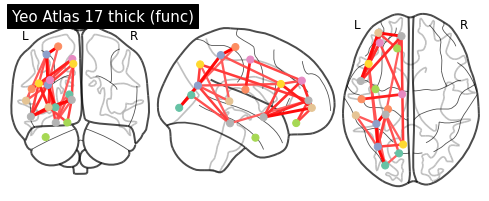

In [3]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

# ConenctivityMeasure from Nilearn uses simple 'correlation' to compute
# connectivity matrices for all subjects in a list
connectome_measure = ConnectivityMeasure(kind='correlation')

# useful for plotting connectivity interactions on glass brain
from nilearn import plotting

# create masker to extract functional data within atlas parcels
masker = NiftiLabelsMasker(labels_img=yeo['thick_17'], standardize=True,
                           memory='nilearn_cache')

# extract time series from all subjects and concatenate them
time_series = []
for func, confounds in zip(data.func, data.confounds):
    time_series.append(masker.fit_transform(func, confounds=confounds))

# calculate correlation matrices across subjects and display
correlation_matrices = connectome_measure.fit_transform(time_series)

# Mean correlation matrix across 10 subjects can be grabbed like this,
# using connectome measure object
mean_correlation_matrix = connectome_measure.mean_

# grab center coordinates for atlas labels
coordinates = plotting.find_parcellation_cut_coords(labels_img=yeo['thick_17'])

# plot connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="80%",
                         title='Yeo Atlas 17 thick (func)')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/nilearn/plotting/displays.py:2205: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  warnings.warn(("'adjacency_matrix' is not symmetric. "


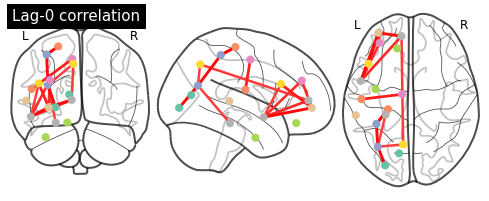

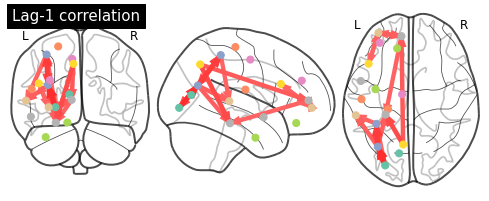

In [4]:
import numpy as np

# Define a custom function to compute lag correlation on the time series
def lag_correlation(time_series, lag):
    n_subjects = len(time_series)
    n_samples, n_features = time_series[0].shape
    lag_cor = np.zeros((n_subjects, n_features, n_features))
    for subject, serie in enumerate(time_series):
        for i in range(n_features):
            for j in range(n_features):
                if lag == 0:
                    lag_cor[subject, i, j] = np.corrcoef(serie[:, i],
                                                         serie[:, j])[0, 1]
                else:
                    lag_cor[subject, i, j] = np.corrcoef(serie[lag:, i],
                                                         serie[:-lag, j])[0, 1]
    return np.mean(lag_cor, axis=0)

# Compute lag-0 and lag-1 correlations and plot associated connectomes
for lag in [0, 1]:
    lag_correlation_matrix = lag_correlation(time_series, lag)
    plotting.plot_connectome(lag_correlation_matrix, coordinates,
                             edge_threshold="90%",
                             title='Lag-{} correlation'.format(
                                 lag))

In [5]:
dim = 64
difumo = datasets.fetch_atlas_difumo(dimension=dim,
                                     resolution_mm=2)


Dataset created in /Users/loganj/nilearn_data/difumo_atlases



 ...done. (1 seconds, 0 min)
Extracting data from /Users/loganj/nilearn_data/difumo_atlases/0fd53859aa9fed124e741c85ec45c705/download..... done.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


 ...done. (1 seconds, 0 min)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/nilearn/image/image.py:1106: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  data = signal.clean(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:303: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/nilearn/input_data/nifti_maps_masker.py:306: UserWarning: Persisting input arguments took 1.49s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the jobli

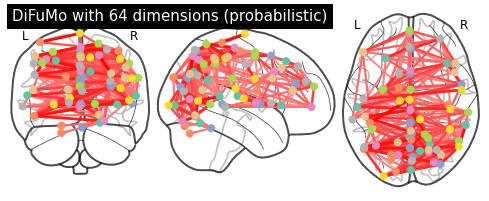

In [6]:
from nilearn.input_data import NiftiMapsMasker

# create masker to extract functional data within atlas parcels
masker = NiftiMapsMasker(maps_img=difumo.maps, standardize=True,
                         memory='nilearn_cache')

# extract time series from all subjects and concatenate them
time_series = []
for func, confounds in zip(data.func, data.confounds):
    time_series.append(masker.fit_transform(func, confounds=confounds))

# calculate correlation matrices across subjects and display
correlation_matrices = connectome_measure.fit_transform(time_series)

# Mean correlation matrix across 10 subjects can be grabbed like this,
# using connectome measure object
mean_correlation_matrix = connectome_measure.mean_

# grab center coordinates for probabilistic atlas
coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img=difumo.maps)

# plot connectome with 85% edge strength in the connectivity
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="85%",
                         title='DiFuMo with {0} dimensions (probabilistic)'.format(dim))
plotting.show()

In [7]:
mean_correlation_matrix

array([[ 1.        ,  0.03154647, -0.02883452, ...,  0.5648817 ,
         0.11102484,  0.0143834 ],
       [ 0.03154647,  1.        ,  0.26791966, ..., -0.01224314,
         0.17120443, -0.01687801],
       [-0.02883452,  0.26791966,  1.        , ..., -0.09584033,
         0.06498527, -0.03120529],
       ...,
       [ 0.5648817 , -0.01224314, -0.09584033, ...,  1.        ,
         0.12171676,  0.10335582],
       [ 0.11102484,  0.17120443,  0.06498527, ...,  0.12171676,
         1.        ,  0.14438103],
       [ 0.0143834 , -0.01687801, -0.03120529, ...,  0.10335582,
         0.14438103,  1.        ]])

In [3]:
from nilearn import datasets

aal_atlas = datasets.fetch_atlas_aal()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [4]:
from nilearn.input_data import NiftiLabelsMasker

masker = NiftiLabelsMasker(labels_img=aal_atlas.maps, standardize=True)

In [5]:
time_series = masker.fit_transform("DATA/ABIDE_50054.nii")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/nilearn/signal.py:64: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


In [47]:
time_series.shape

(1, 116)

/home/loganj/.local/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


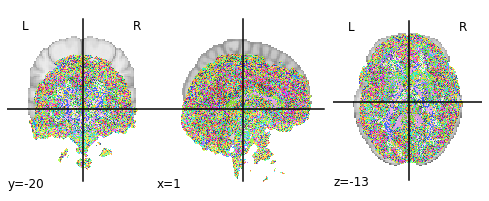

In [4]:
from nilearn import plotting

plotting.plot_roi("./kmeans_parcellation.nii.gz")

In [3]:
from nilearn.decomposition import CanICA

canica = CanICA(n_components=20,
                verbose=10, mask_strategy='whole-brain-template',
                random_state=0)

canica.fit("./DATA/ABIDE_50054.nii")

test = canica.components_img_

[MultiNiftiMasker.fit] Loading data from [DATA/ABIDE_50054.nii]
[MultiNiftiMasker.fit] Computing mask
Template whole-brain mask computation
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(176, 256, 256, 1),
affine=array([[  -1.05000007,    0.        ,    0.        ,   92.60139465],
       [   0.        ,    1.05078125,    0.        , -136.96731567],
       [   0.        ,    0.        ,    1.05078125, -157.06939697],
       [   0.        ,    0.        ,    0.        ,    1.        ]])
)
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/nilearn/signal.py:198: UserWarning: Detrending of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Detrending of 3D signal has been requested but '
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/nilearn/signal.py:64: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s r

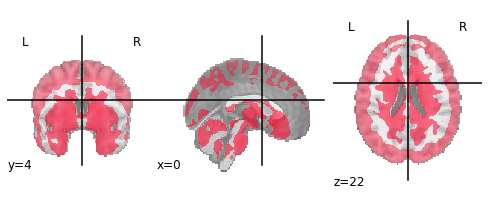

In [5]:
from nilearn.plotting import plot_prob_atlas

plot_prob_atlas(canica.components_img_)

In [10]:
canica.components_

array([[-0.00097467, -0.00098812, -0.000998  , ..., -0.00120389,
        -0.0012144 , -0.00120283]], dtype=float32)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/nilearn/plotting/displays.py:1750: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fh.add_axes([fraction * index * (x1 - x0) + x0, y0,


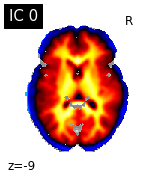

In [11]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(canica.components_img_)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

In [21]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn import datasets

atlas = datasets.fetch_atlas_aal()

masker = NiftiLabelsMasker(labels_img=atlas.maps, standardize=True, labels=atlas.labels)
obj = masker.fit_transform("DATA/ABIDE_50054.nii")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/nilearn/signal.py:64: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


In [22]:
obj

array([[ 56.10748443,  49.38183218,  81.4388755 ,  74.97267819,
        257.51035834, 236.33511252,  77.57805856,  73.72418783,
        200.53406408, 182.26770518, 124.10330169, 125.55508158,
        122.75723869, 106.02766637, 235.77055449, 203.8337891 ,
        191.62984945, 181.29830694,  66.9501358 ,  67.27299739,
        300.81677704, 295.54757282, 128.65820022, 124.99881657,
        204.96510125, 235.44271546, 249.72555889, 274.07741477,
        261.76199305, 259.0826156 , 208.61549546, 248.85269512,
        172.81966251, 195.29496495, 225.18033898, 253.89464741,
        309.30084086, 324.35674069, 320.77491866, 312.84657948,
        309.14074074, 303.515625  , 215.07491208, 237.28878072,
        134.07920698, 141.26897959, 292.29331877, 284.96248251,
         92.23140156, 102.12307844, 126.79431431, 129.71554252,
        177.37827654, 174.7387483 , 283.15518312, 291.23660765,
         48.62393641,  48.46334144,  32.2403954 ,  23.50918618,
         53.3926557 ,  50.67606587,  72.

In [27]:
obj = obj[0]

In [28]:
obj

array([ 56.10748443,  49.38183218,  81.4388755 ,  74.97267819,
       257.51035834, 236.33511252,  77.57805856,  73.72418783,
       200.53406408, 182.26770518, 124.10330169, 125.55508158,
       122.75723869, 106.02766637, 235.77055449, 203.8337891 ,
       191.62984945, 181.29830694,  66.9501358 ,  67.27299739,
       300.81677704, 295.54757282, 128.65820022, 124.99881657,
       204.96510125, 235.44271546, 249.72555889, 274.07741477,
       261.76199305, 259.0826156 , 208.61549546, 248.85269512,
       172.81966251, 195.29496495, 225.18033898, 253.89464741,
       309.30084086, 324.35674069, 320.77491866, 312.84657948,
       309.14074074, 303.515625  , 215.07491208, 237.28878072,
       134.07920698, 141.26897959, 292.29331877, 284.96248251,
        92.23140156, 102.12307844, 126.79431431, 129.71554252,
       177.37827654, 174.7387483 , 283.15518312, 291.23660765,
        48.62393641,  48.46334144,  32.2403954 ,  23.50918618,
        53.3926557 ,  50.67606587,  72.80009035,  79.82

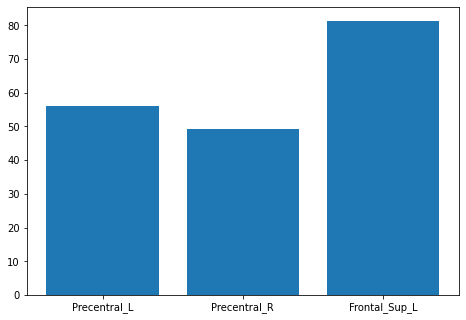

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
labels = [atlas.labels[0], atlas.labels[1], atlas.labels[2]]
values = [obj[0], obj[1], obj[2]]
ax.bar(labels, values)
plt.show()

In [33]:
from nilearn.connectome import ConnectivityMeasure
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas.maps, standardize=True,
                           memory='nilearn_cache', verbose=5)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction
time_series = masker.fit_transform("DATA/ABIDE_50054.nii")
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

correlation_matrix

[NiftiLabelsMasker.fit_transform] loading data from /Users/loganj/nilearn_data/aal_SPM12/aal/atlas/AAL.nii
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('DATA/ABIDE_50054.nii', <nilearn.input_data.nifti_labels_masker._ExtractionFunctor object at 0x7fa5ed600f70>, 
{ 'background_label': 0,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'labels': None,
  'labels_img': '/Users/loganj/nilearn_data/aal_SPM12/aal/atlas/AAL.nii',
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  'strategy': 'mean',
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=None, sample_mask=None, dtype=None, memory=Memory(location=nilearn_cache/joblib), memory_level=1, verbose=5)
[NiftiLabelsMasker.transform_single_

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/nilearn/signal.py:64: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/covariance/_shrunk_covariance.py:203: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/covariance/_empirical_covariance.py:88: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn("Only one sample available. "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/nilearn/connectome/connectivity_matrices.py:333: RuntimeWarning: divide by zero encountered in true_divide
  diagonal = np.atleast_2d(1. / np.sqrt(

array([[ 1., nan, nan, ..., nan, nan, nan],
       [nan,  1., nan, ..., nan, nan, nan],
       [nan, nan,  1., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  1., nan, nan],
       [nan, nan, nan, ..., nan,  1., nan],
       [nan, nan, nan, ..., nan, nan,  1.]])